# Importing Libraries

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Reading the data

In [270]:
data = pd.read_csv('/content/sample_data/AirQuality.csv',sep=';')

data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [271]:
data.shape

(9471, 17)

# Data Analysis

In [272]:
data.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)


In [273]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [274]:
data.shape

(9471, 15)

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


## Replacing the commas in the data and changing it to float values

In [276]:
data.iloc[:,2] = data.iloc[:,2].replace(',','.',regex=True)
data.iloc[:,5] = data.iloc[:,5].replace(',','.',regex=True)
data.iloc[:,12] = data.iloc[:,12].replace(',','.',regex=True)
data.iloc[:,13] = data.iloc[:,13].replace(',','.',regex=True)
data.iloc[:,14] = data.iloc[:,14].replace(',','.',regex=True)

In [277]:
data.drop(['Date','Time'],axis=1,inplace=True)

data = data.astype({'CO(GT)':'float64',
             'C6H6(GT)':'float64',
             'T':'float64',
             'RH':'float64',
             'AH':'float64'})


In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 962.0 KB


In [279]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


## #Handling null values and duplicates in the data

In [280]:
data.isnull().sum()

,0
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114
PT08.S4(NO2),114
PT08.S5(O3),114


In [281]:
#to delete the rows that has nulls
data.dropna(inplace=True)

In [282]:
# it was (9471, 15)
data.shape

(9357, 13)

In [283]:
data.duplicated().sum()

31

In [284]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [285]:
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9322,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9323,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9324,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


## Handling Outilers of the data

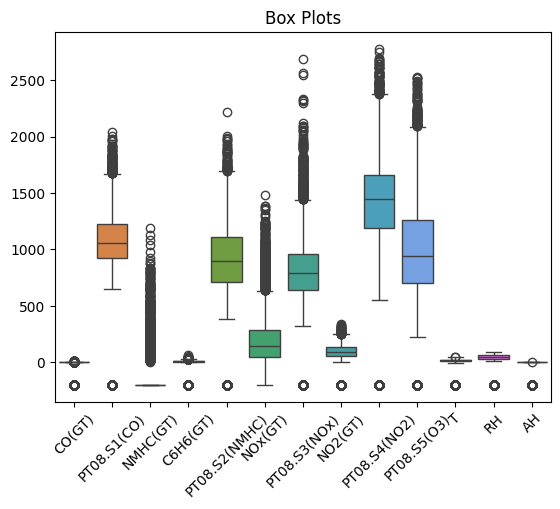

In [286]:
sns.boxplot(data)
plt.xticks(rotation=45)
plt.title('Box Plots');

In [287]:
df.shape

(9326, 13)

In [288]:
column_list = data.columns.tolist()
print(column_list)

['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [289]:
def remove_outliers(data,column,lower=0.01,upper=0.99):
    lower_bound = data[column].quantile(lower)
    upper_bound = data[column].quantile(upper)

    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    outliers = data[(data[column] <= lower_bound) | (data[column] >= upper_bound)]

    return cleaned_data,outliers
df=remove_outliers(data,column_list,lower=0.01,upper=0.99)

In [290]:
df = data.reset_index().drop('index',axis=1)

In [291]:
df.shape

(9326, 13)

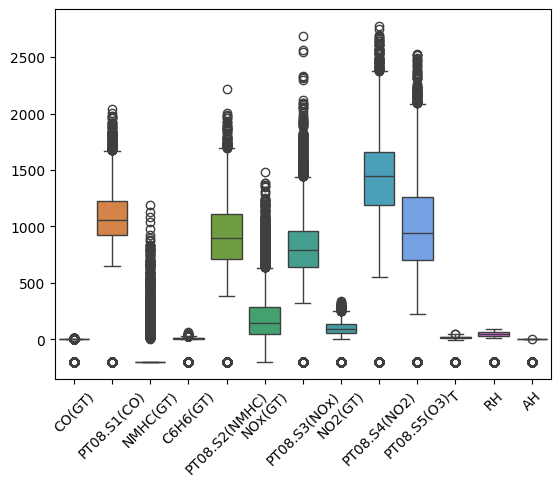

In [292]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

## Handling skewness of the data

In [293]:
df.skew()

,0
CO(GT),-1.689473
PT08.S1(CO),-1.694625
NMHC(GT),4.067936
C6H6(GT),-4.709609
PT08.S2(NMHC),-0.752770
NOx(GT),0.827866
PT08.S3(NOx),-0.331973
NO2(GT),-1.241254
PT08.S4(NO2),-1.213417
PT08.S5(O3),-0.003496


In [294]:
X = df.copy()

In [295]:

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

X = pd.DataFrame(pt.fit_transform(X),columns=X.columns)

In [296]:
X.skew()

,0
CO(GT),0.818830
PT08.S1(CO),-0.768056
NMHC(GT),2.706730
C6H6(GT),1.315749
PT08.S2(NMHC),-0.256447
NOx(GT),0.680571
PT08.S3(NOx),0.171067
NO2(GT),-0.103231
PT08.S4(NO2),-0.730554
PT08.S5(O3),0.075553


In [297]:

def compare_kde(column):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    df[column].plot(kind='kde')
    plt.title(column)
    plt.xlabel(column)

    plt.subplot(1,2,2)
    X[column].plot(kind='kde')
    plt.title(column)
    plt.xlabel(column)

    plt.show()

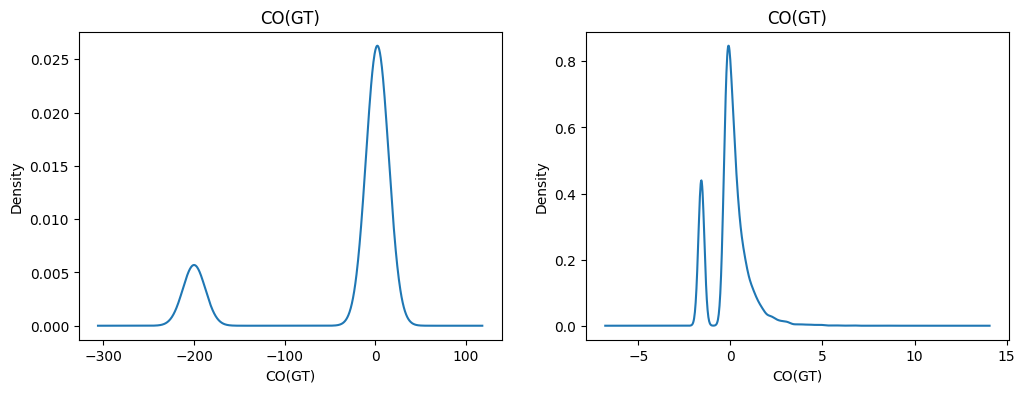

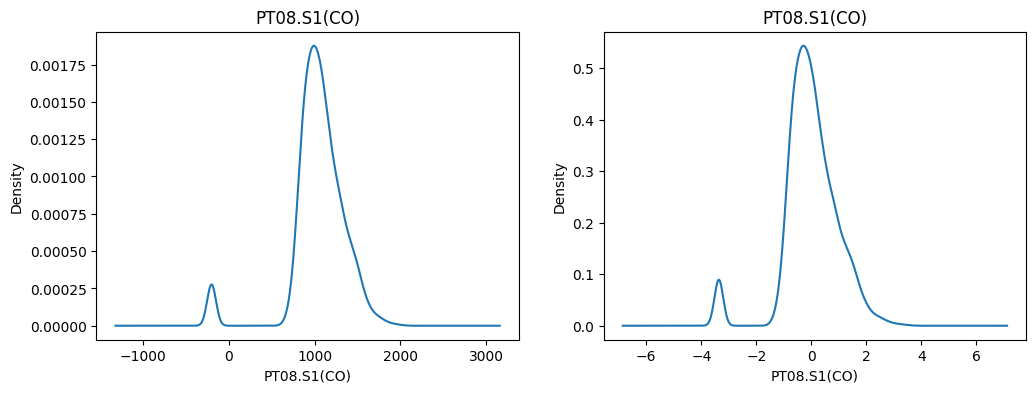

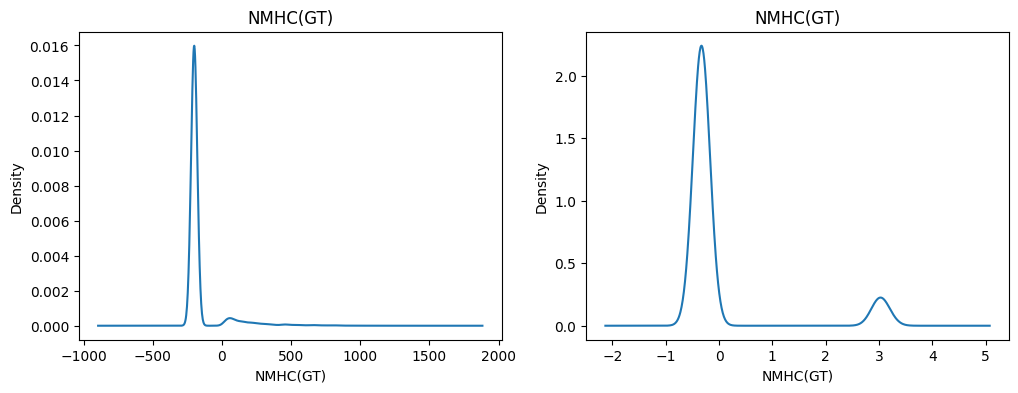

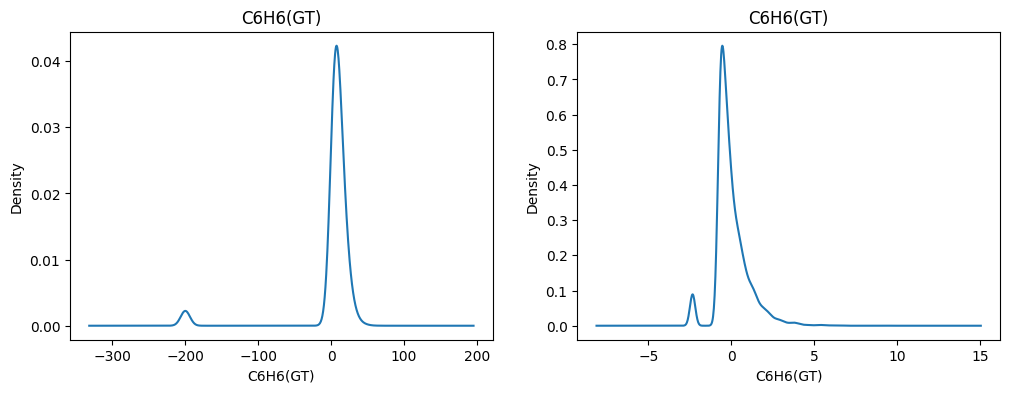

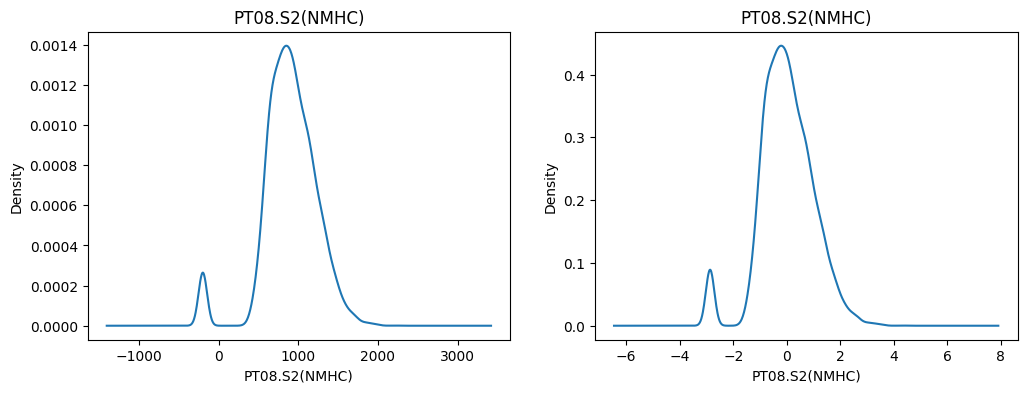

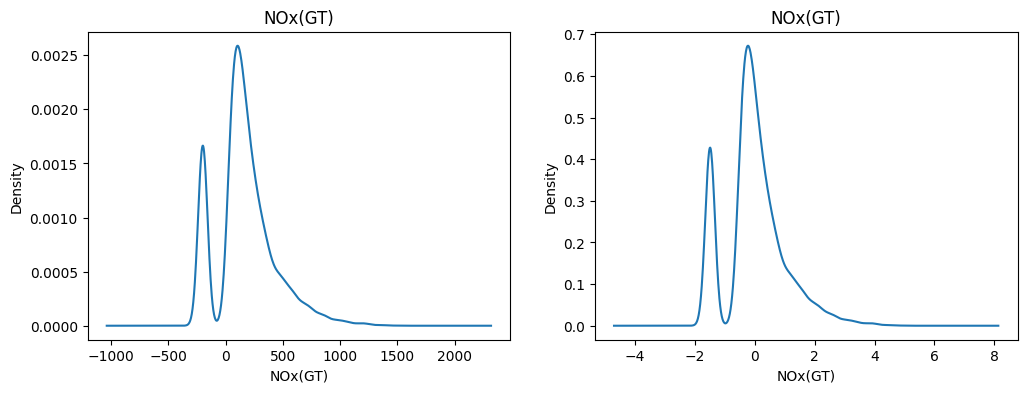

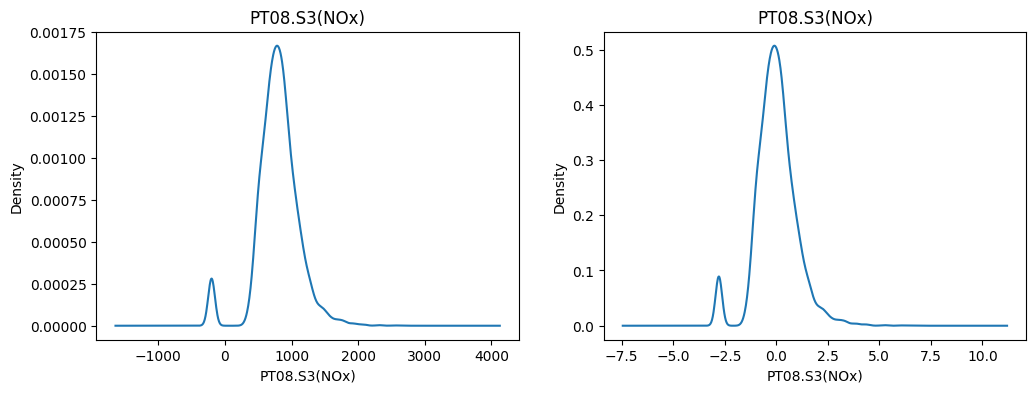

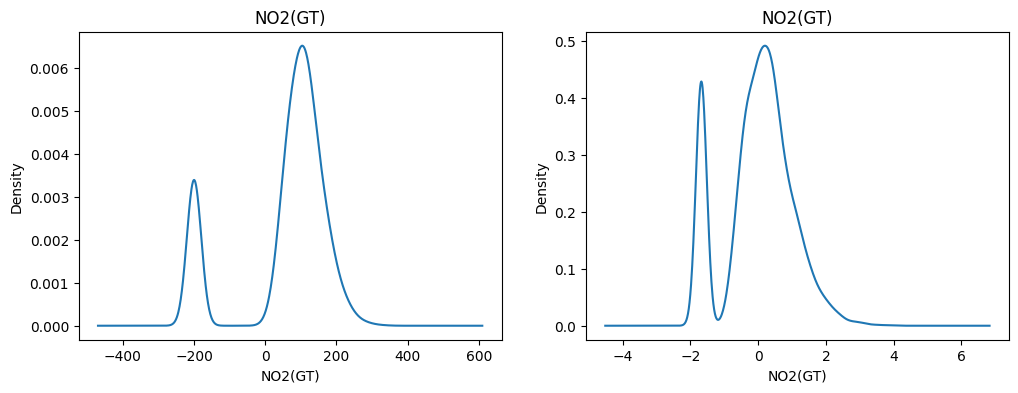

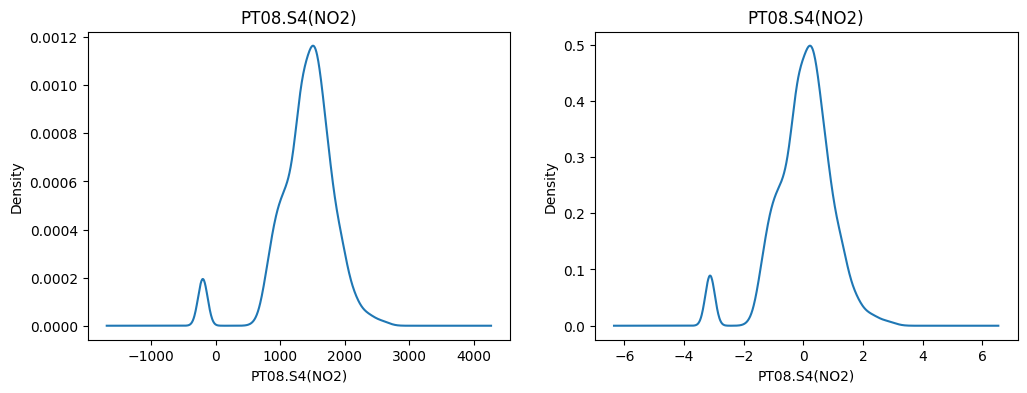

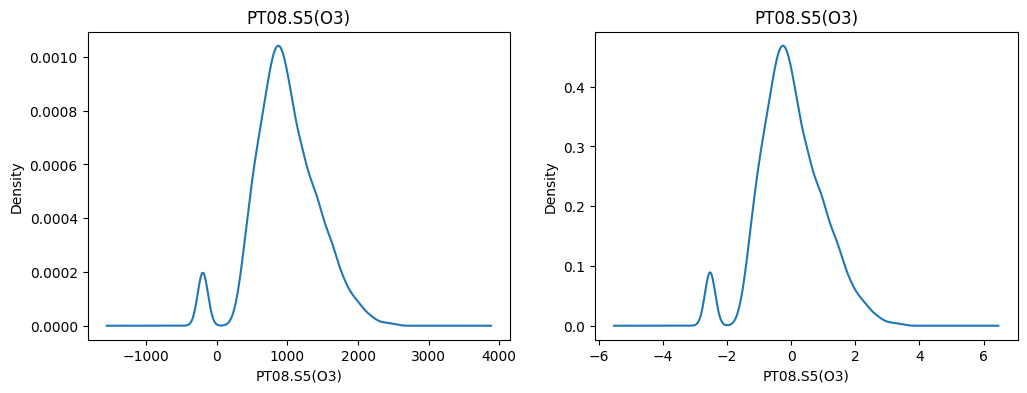

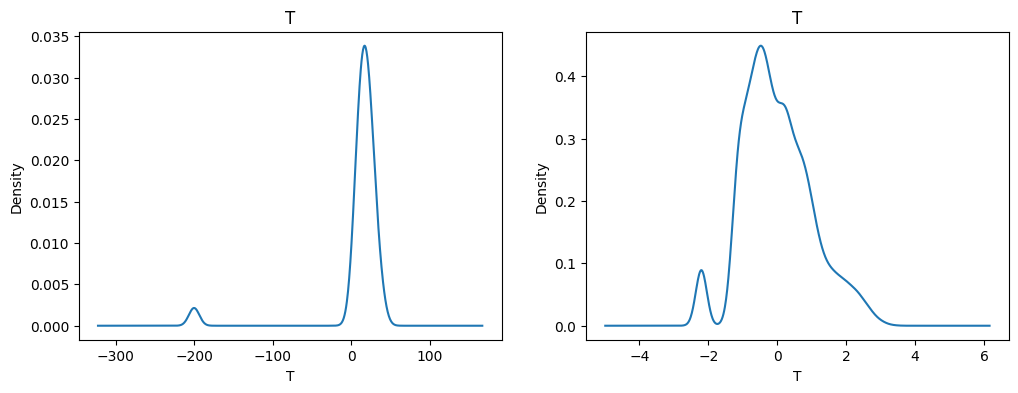

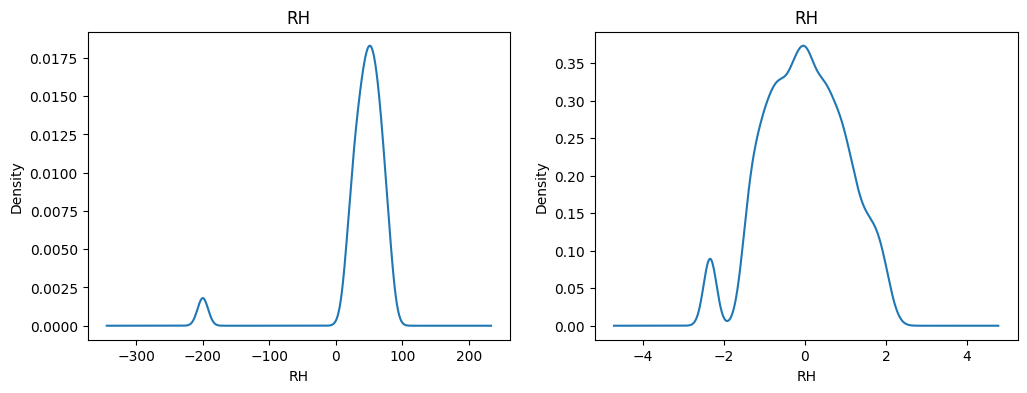

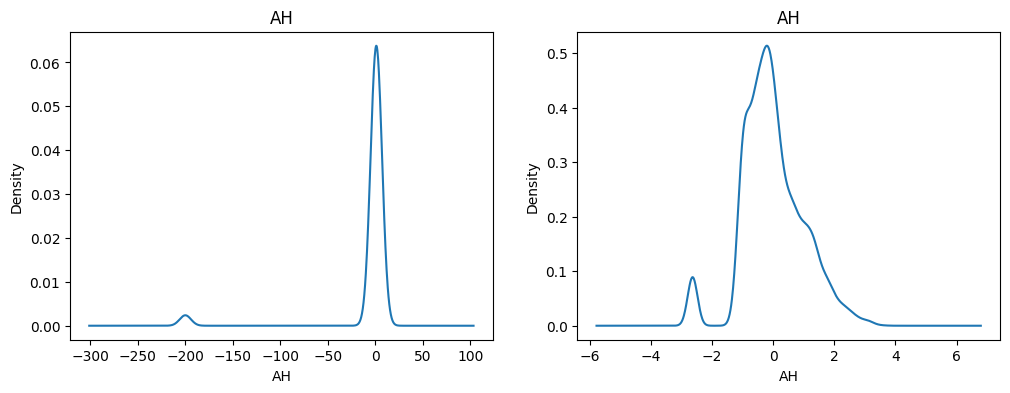

In [298]:
for i in df.columns:
    compare_kde(i)

# Visualizing Heatmap

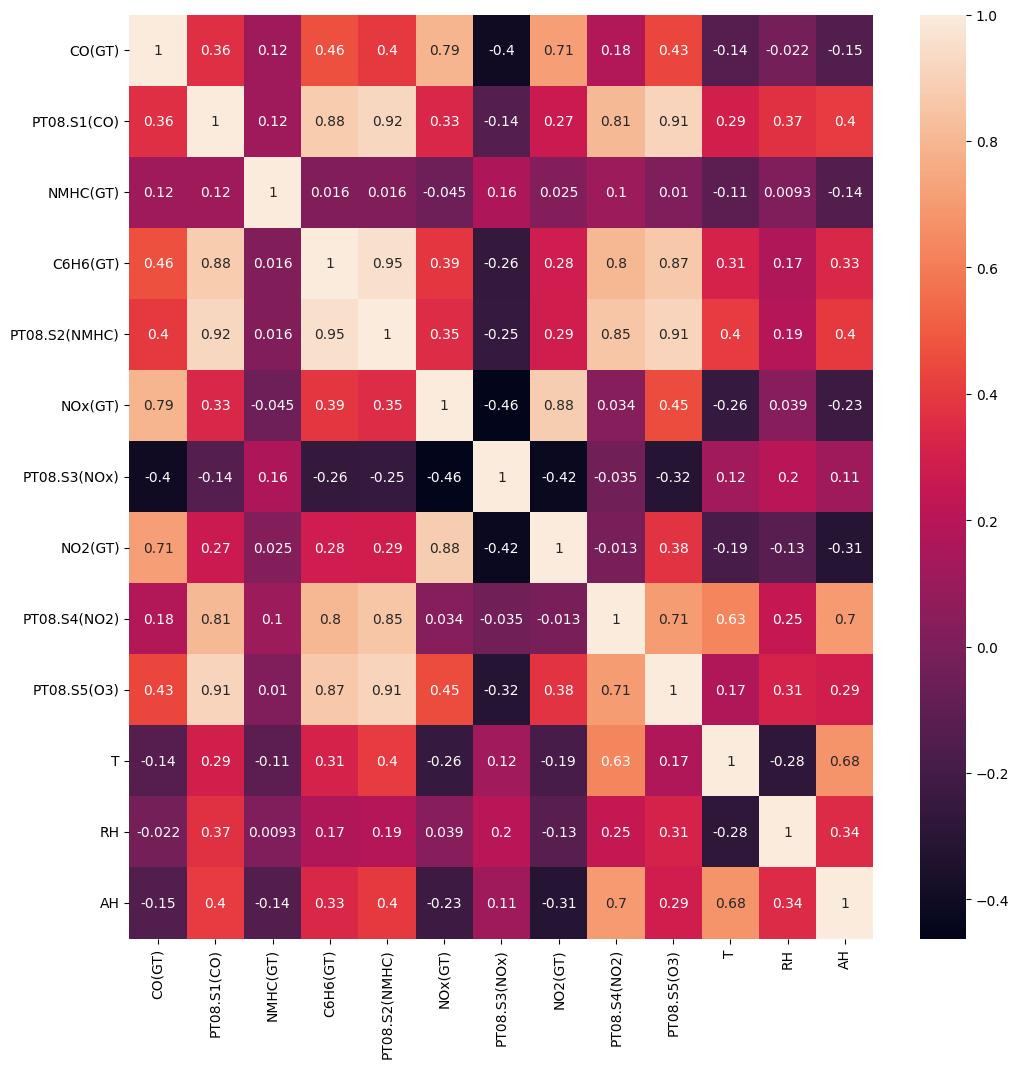

In [299]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(),annot=True)
plt.show()

# Scatter Plotting For C6H6


In [300]:
def scatter_plot_AH(column):
    plt.scatter(X[column],X['C6H6(GT)'])
    plt.xlabel(column)
    plt.ylabel('C6H6(GT)')
    plt.title(f'{column} vs C6H6(GT)')
    plt.show()

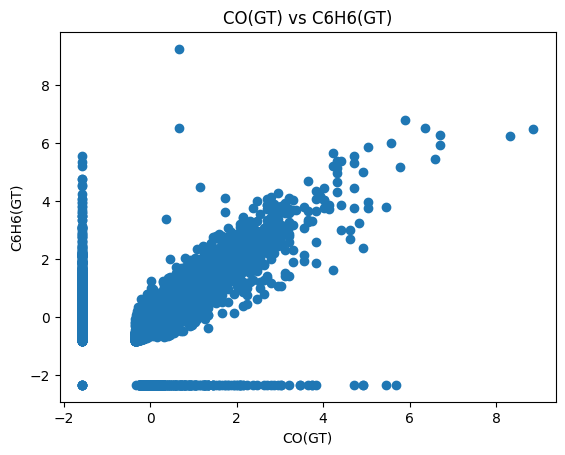

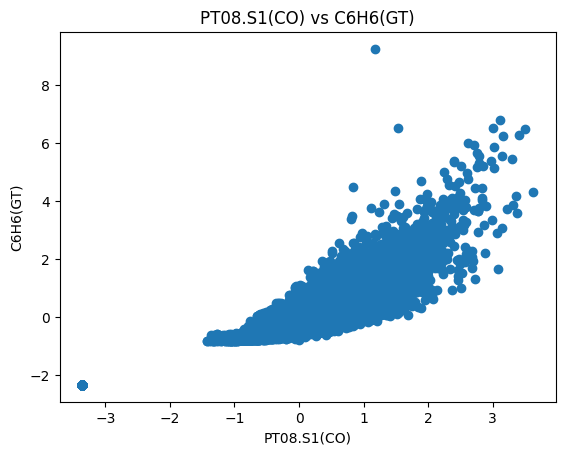

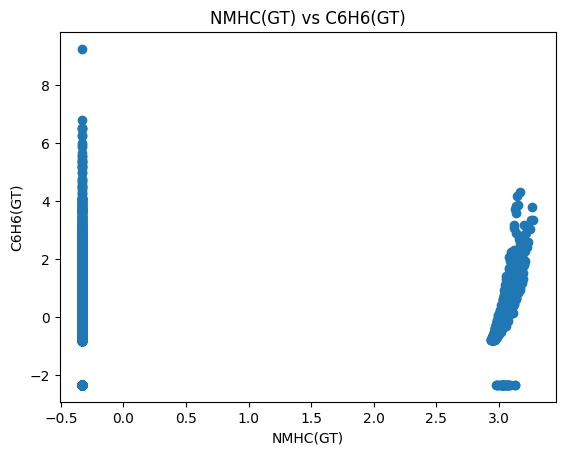

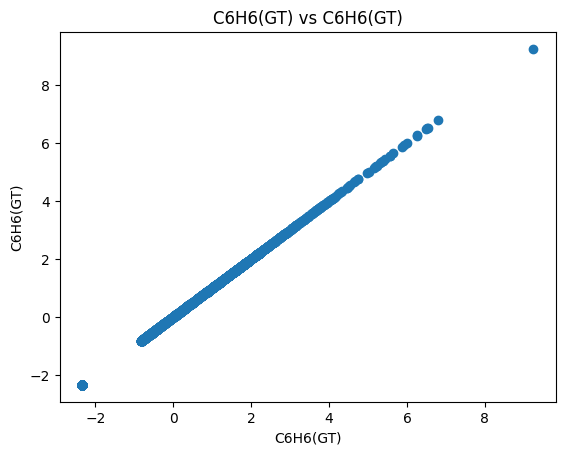

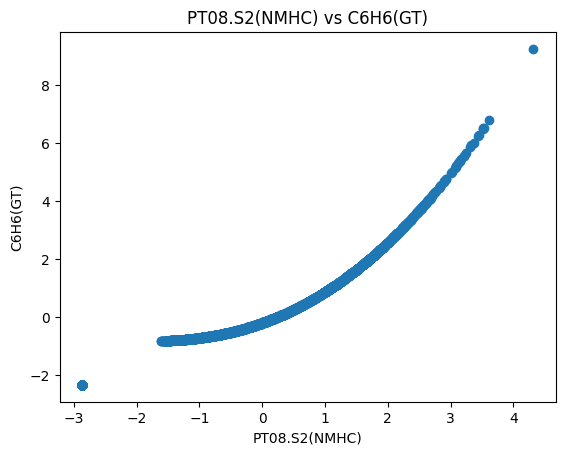

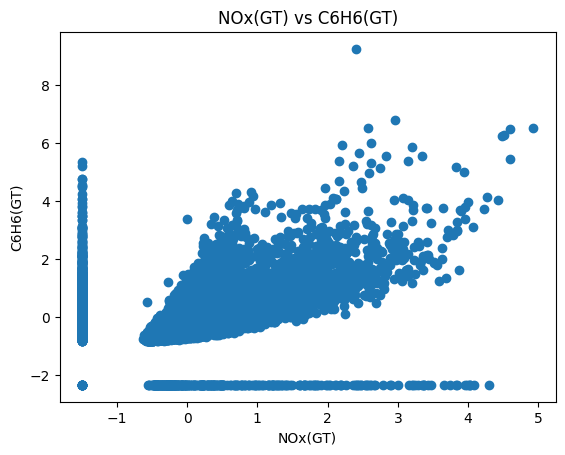

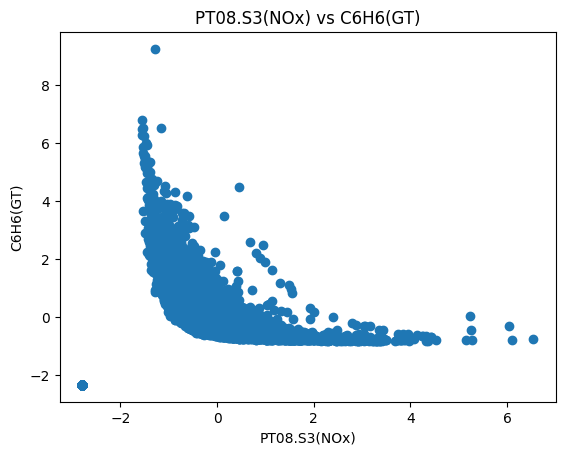

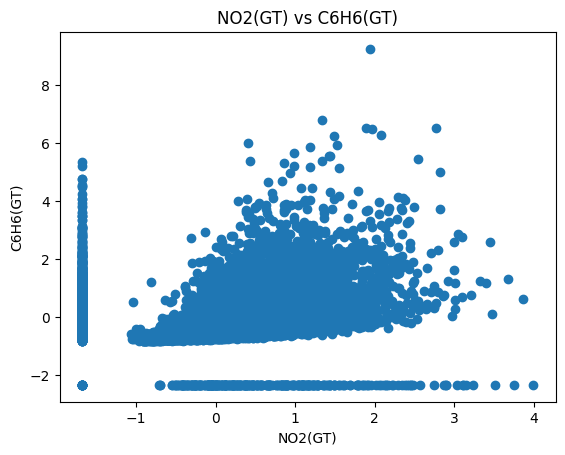

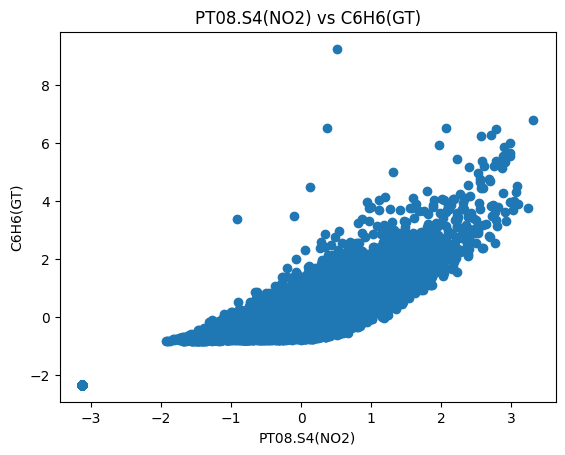

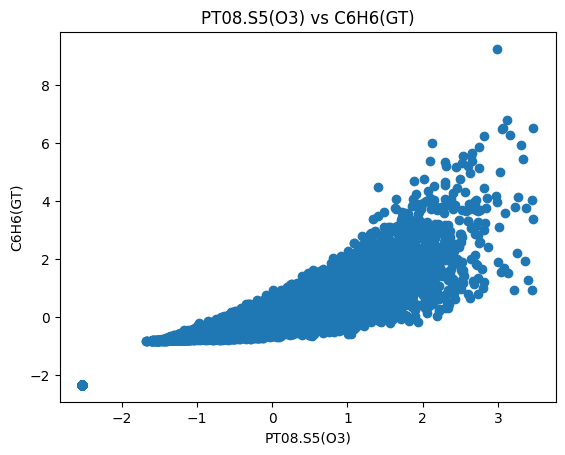

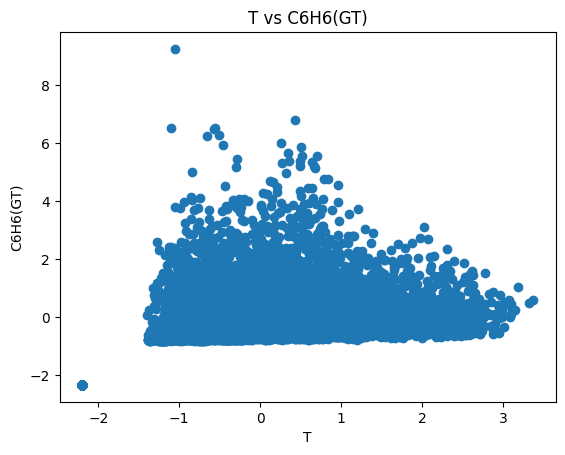

In [301]:
for i in range(len(X.columns)-2):
    scatter_plot_AH(X.columns[i])

# Splitting the dataset

Target Values:

In [302]:
y = X['C6H6(GT)']
X = X.drop('C6H6(GT)',axis=1)

In [303]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

# Training the data with Machine Learning Model

##Random Forest Model

In [304]:
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)


print("\nRandom Forest Metrics:")
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R^2 Score:", rf_r2)


Random Forest Metrics:
Mean Squared Error: 0.0003766157993558616
Mean Absolute Error: 0.0023217544692924925
R^2 Score: 0.9996398730431632


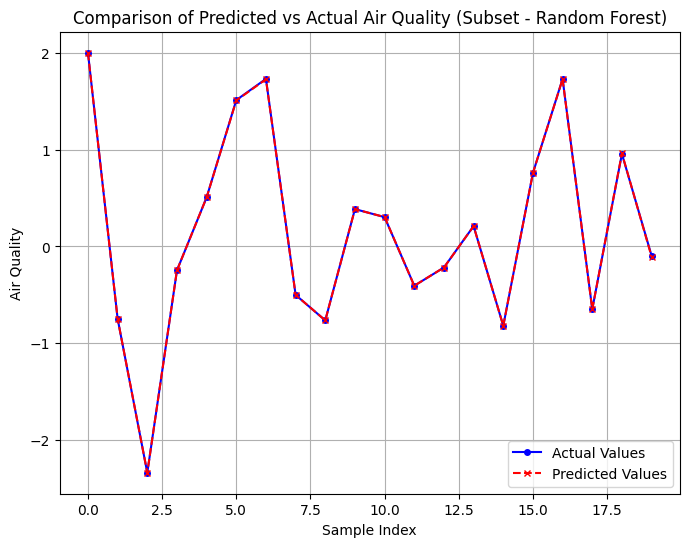

In [305]:
predictions = rf_model.predict(X_test)
subset = 20
plt.figure(figsize=(8, 6))
plt.plot(y_test.values[:subset], label='Actual Values', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(predictions[:subset], label='Predicted Values', color='red', linestyle='--', marker='x', markersize=4)
plt.xlabel('Sample Index')
plt.ylabel('Air Quality')
plt.title('Comparison of Predicted vs Actual Air Quality (Subset - Random Forest)') # Changed title
plt.legend()
plt.grid(True)
plt.show()

## LinearRegression

In [306]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the linear regression model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("\nLinear Regression Metrics:")
print("Mean Squared Error:", linear_mse)
print("Mean Absolute Error:", linear_mae)
print("R^2 Score:", linear_r2)



Linear Regression Metrics:
Mean Squared Error: 0.06120585706530985
Mean Absolute Error: 0.17439785065210894
R^2 Score: 0.9414738333250553


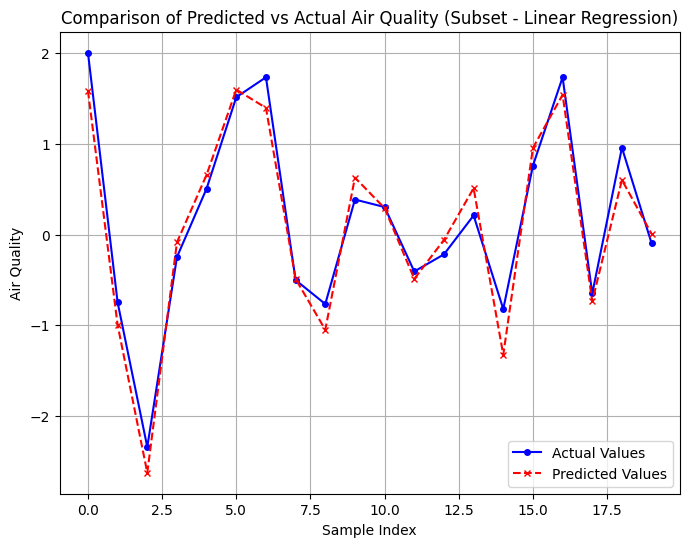

In [307]:
import matplotlib.pyplot as plt

predictions = linear_model.predict(X_test)
subset = 20
plt.figure(figsize=(8, 6))
plt.plot(y_test.values[:subset], label='Actual Values', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(predictions[:subset], label='Predicted Values', color='red', linestyle='--', marker='x', markersize=4)
plt.xlabel('Sample Index')
plt.ylabel('Air Quality')
plt.title('Comparison of Predicted vs Actual Air Quality (Subset - Linear Regression)') # Changed title
plt.legend()
plt.grid(True)
plt.show()

## Decision Tree Regressor

In [308]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print("\nDecision Tree Regressor Metrics:")
print("Mean Squared Error:", dt_mse)
print("Mean Absolute Error:", dt_mae)
print("R^2 Score:", dt_r2)


Decision Tree Regressor Metrics:
Mean Squared Error: 0.0003039450325447165
Mean Absolute Error: 0.0025442307897271888
R^2 Score: 0.9997093621674842


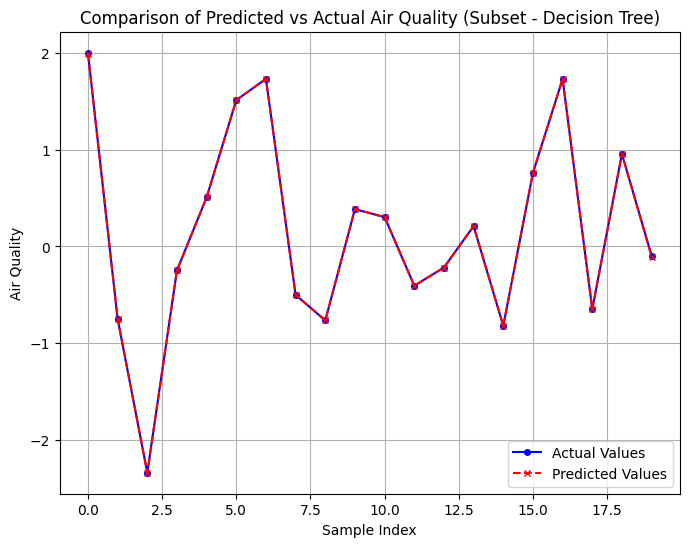

In [309]:
import matplotlib.pyplot as plt
predictions = dt_model.predict(X_test)
subset = 20
plt.figure(figsize=(8, 6))
plt.plot(y_test.values[:subset], label='Actual Values', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(predictions[:subset], label='Predicted Values', color='red', linestyle='--', marker='x', markersize=4)
plt.xlabel('Sample Index')
plt.ylabel('Air Quality')
plt.title('Comparison of Predicted vs Actual Air Quality (Subset - Decision Tree)') # Changed title
plt.legend()
plt.grid(True)
plt.show()

## Trying Neural Network

In [310]:
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential


# Modify the model by adding Dropout layers
dl_model = Sequential()

dl_model.add(Dense(64, input_shape=(X_train.shape[1],)))
dl_model.add(LeakyReLU())
dl_model.add(Dropout(0.2))  # Adding Dropout with a rate of 0.2
dl_model.add(Dense(128, activation='sigmoid'))
dl_model.add(Dropout(0.2))  # Adding Dropout to the second layer
dl_model.add(Dense(1))

# Compile the model
dl_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Display the model summary
dl_model.summary()

# Early stopping callback to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
dl_model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping_callback])

# Predict using the trained model
dl_y_pred = dl_model.predict(X_test).flatten()

# Evaluate the model
dl_r2 = r2_score(y_true=y_test, y_pred=dl_y_pred)
dl_mae = mean_absolute_error(y_true=y_test, y_pred=dl_y_pred)
dl_mse = mean_squared_error(y_true=y_test, y_pred=dl_y_pred)

print(f'Mean Squared Error: {dl_mse}')
print(f'Mean Absolute Error: {dl_mae}')
print(f'R^2 Score: {dl_r2}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,281 (36.25 KB)

 Trainable params: 9,281 (36.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7327 - mse: 0.7327 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1978 - mse: 0.1978 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1498 - mse: 0.1498 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1189 - mse: 0.1189 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1023 - mse: 0.1023 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0818 - mse: 0.0818 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0757 - mse: 0.0757 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 9/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


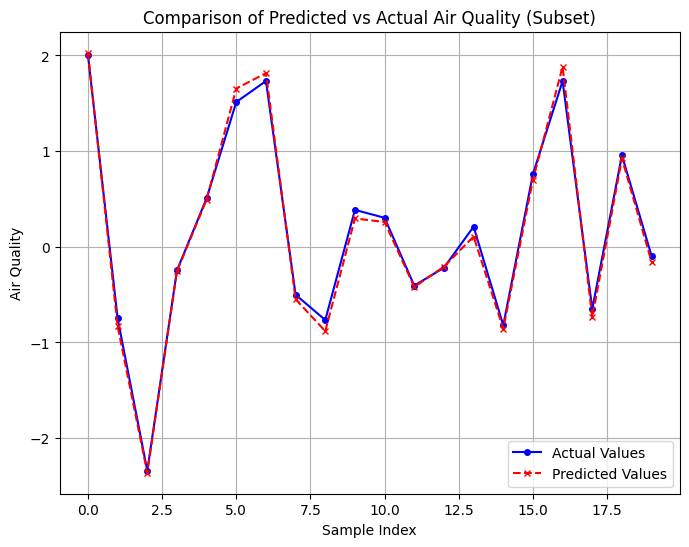

In [311]:
import matplotlib.pyplot as plt

predictions = dl_model.predict(X_test)
subset = 20
plt.figure(figsize=(8, 6))
plt.plot(y_test.values[:subset], label='Actual Values', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(predictions[:subset], label='Predicted Values', color='red', linestyle='--', marker='x', markersize=4)
plt.xlabel('Sample Index')
plt.ylabel('Air Quality')
plt.title('Comparison of Predicted vs Actual Air Quality (Subset)')
plt.legend()
plt.grid(True)
plt.show()

# Model Selection / Comparison Analysis.

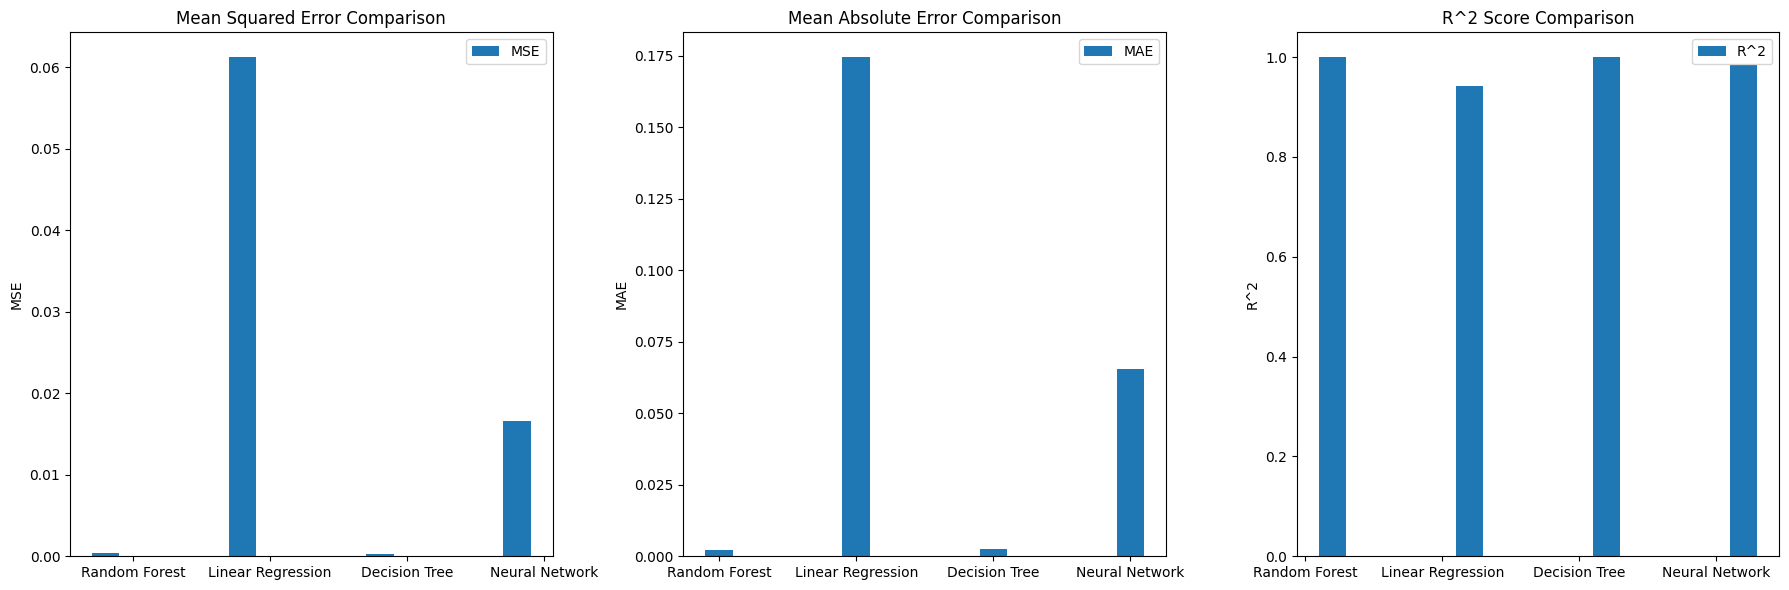

In [312]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Random Forest', 'Linear Regression', 'Decision Tree', 'Neural Network']
mse_scores = [rf_mse, linear_mse, dt_mse, dl_mse]
mae_scores = [rf_mae, linear_mae, dt_mae, dl_mae]
r2_scores = [rf_r2, linear_r2, dt_r2, dl_r2]

metrics = ['MSE', 'MAE', 'R^2']
x = np.arange(len(model_names))
width = 0.2

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axes[0].bar(x - width, mse_scores, width, label='MSE')
axes[0].set_ylabel('MSE')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names)
axes[0].set_title('Mean Squared Error Comparison')
axes[0].legend()

axes[1].bar(x, mae_scores, width, label='MAE')
axes[1].set_ylabel('MAE')
axes[1].set_xticks(x)
axes[1].set_xticklabels(model_names)
axes[1].set_title('Mean Absolute Error Comparison')
axes[1].legend()

axes[2].bar(x + width, r2_scores, width, label='R^2')
axes[2].set_ylabel('R^2')
axes[2].set_xticks(x)
axes[2].set_xticklabels(model_names)
axes[2].set_title('R^2 Score Comparison')
axes[2].legend()

plt.tight_layout()
plt.show()

# Feature Importance

          Feature    Importance
3   PT08.S2(NMHC)  8.647399e-01
11             AH  2.340602e-02
9               T  2.191321e-02
1     PT08.S1(CO)  2.098650e-02
5    PT08.S3(NOx)  1.989009e-02
8     PT08.S5(O3)  1.780017e-02
10             RH  1.623761e-02
7    PT08.S4(NO2)  1.492483e-02
0          CO(GT)  6.535961e-05
4         NOx(GT)  2.732176e-05
6         NO2(GT)  8.716299e-06
2        NMHC(GT)  2.254992e-07


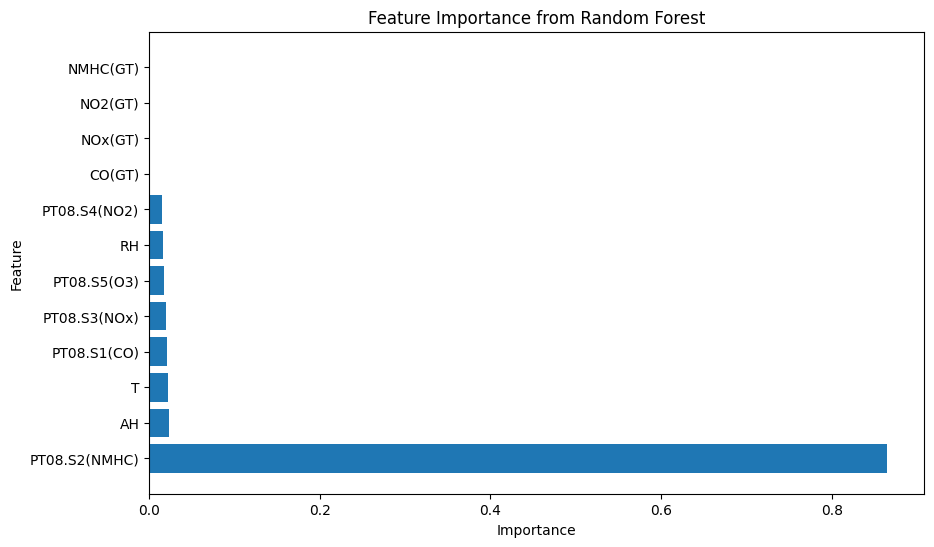

In [313]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

# Visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()